In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
training_set = pd.read_csv('UNSW_NB15_training-set.csv')
training_set.head()
# testing_set = pd.read_csv('UNSW_NB15_testing-set.csv')
# testing_set.head()


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
testing_set = pd.read_csv('UNSW_NB15_testing-set.csv')
testing_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
testing_set.shape

(175341, 45)

In [5]:
training_set.shape

(82332, 45)

In [6]:
training_set['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [7]:
testing_set['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [8]:
training_set['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [9]:
testing_set['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

In [10]:
binary_dict = {'Normal': 'normal',
                'Generic': 'attack',
                'Exploits': 'attack',
                'Fuzzers': 'attack',
                'DoS': 'attack',
              'Reconnaissance': 'attack',
                'Analysis': 'attack',
                'Backdoor': 'attack',
                'Shellcode': 'attack',
               'Worms': 'attack'
              }

df_train_bi = testing_set.copy()
df_test_bi = training_set.copy()

df_train_bi['attack_cat'] = df_train_bi['attack_cat'].apply(binary_dict.get)
df_test_bi['attack_cat'] = df_test_bi['attack_cat'].apply(binary_dict.get)


print('Train data class: ',df_train_bi['attack_cat'].unique())
print('Train data class: ',df_test_bi['attack_cat'].unique())

print('Train data dim: ',df_train_bi.shape)
print('Test data dim: ',df_test_bi.shape)


Train data class:  ['normal' 'attack']
Train data class:  ['normal' 'attack']
Train data dim:  (175341, 45)
Test data dim:  (82332, 45)


In [11]:
mask = (df_train_bi.dtypes == np.object)
print(df_train_bi.loc[:,mask].head())
list_cat = df_train_bi.loc[:,mask].columns.tolist()
print(list_cat)
print(df_train_bi.loc[:,mask].values)

  proto service state attack_cat
0   tcp       -   FIN     normal
1   tcp       -   FIN     normal
2   tcp       -   FIN     normal
3   tcp     ftp   FIN     normal
4   tcp       -   FIN     normal
['proto', 'service', 'state', 'attack_cat']
[['tcp' '-' 'FIN' 'normal']
 ['tcp' '-' 'FIN' 'normal']
 ['tcp' '-' 'FIN' 'normal']
 ...
 ['udp' 'dns' 'INT' 'attack']
 ['udp' 'dns' 'INT' 'attack']
 ['udp' 'dns' 'INT' 'attack']]


In [12]:
mask = (df_test_bi.dtypes == np.object)
print(df_test_bi.loc[:,mask].head())
list_cat = df_test_bi.loc[:,mask].columns.tolist()
print(list_cat)
print(df_test_bi.loc[:,mask].values)

  proto service state attack_cat
0   udp       -   INT     normal
1   udp       -   INT     normal
2   udp       -   INT     normal
3   udp       -   INT     normal
4   udp       -   INT     normal
['proto', 'service', 'state', 'attack_cat']
[['udp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']
 ...
 ['arp' '-' 'INT' 'normal']
 ['arp' '-' 'INT' 'normal']
 ['udp' '-' 'INT' 'normal']]


In [13]:
mask = (df_train_bi.dtypes != np.object)
print(df_train_bi.loc[:,mask].head())
list_num = df_train_bi.loc[:,mask].columns.tolist()
print(list_num)
print(df_train_bi.loc[:,mask].values)

   id       dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0   1  0.121478      6      4     258     172  74.087490   252   254   
1   2  0.649902     14     38     734   42014  78.473372    62   252   
2   3  1.623129      8     16     364   13186  14.170161    62   252   
3   4  1.681642     12     12     628     770  13.677108    62   252   
4   5  0.449454     10      6     534     268  33.373826   254   252   

          sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  14158.942380  ...                 1                 1               1   
1   8395.112305  ...                 1                 1               2   
2   1572.271851  ...                 1                 1               3   
3   2740.178955  ...                 1                 1               3   
4   8561.499023  ...                 2                 1              40   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0          

In [14]:
mask = (df_test_bi.dtypes != np.object)
print(df_test_bi.loc[:,mask].head())
list_num = df_test_bi.loc[:,mask].columns.tolist()
print(list_num)
print(df_test_bi.loc[:,mask].values)

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  180363632.0  ...                 1                 1               2   
1  881000000.0  ...                 1                 1               2   
2  854400000.0  ...                 1                 1               3   
3  600000000.0  ...                 2                 1               3   
4  850400000.0  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0    

In [15]:
df_train_bi.loc[:,mask].describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [16]:
df_test_bi.loc[:,mask].describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [17]:
#  Check whether the positive label (1) match attack categories, and whether attack categories match labelled data.

# all(iterable) returns True if all elements of the iterable are considered as true values
print(all(((df_test_bi.label == 1) & (df_test_bi.attack_cat != 'normal')) == (df_test_bi.attack_cat != 'normal')))
print(all(((df_test_bi.attack_cat != 'normal') & (df_test_bi.label == 1)) == (df_test_bi.label == 1)))

True
True


In [18]:
#  Check whether the positive label (1) match attack categories, and whether attack categories match labelled data.

# all(iterable) returns True if all elements of the iterable are considered as true values
print(all(((df_train_bi.label == 1) & (df_train_bi.attack_cat != 'normal')) == (df_train_bi.attack_cat != 'normal')))
print(all(((df_train_bi.attack_cat != 'normal') & (df_train_bi.label == 1)) == (df_train_bi.label == 1)))

True
True


In [19]:
# number of occurrences for each attack category
df_train_bi.attack_cat.value_counts()

attack    119341
normal     56000
Name: attack_cat, dtype: int64

In [20]:
# number of occurrences for each attack category
df_test_bi.attack_cat.value_counts()

attack    45332
normal    37000
Name: attack_cat, dtype: int64

In [21]:
mask = (df_train_bi.label == 1)
print(df_train_bi.loc[mask,:].service.value_counts())
print(df_train_bi.loc[mask,:].proto.value_counts())

-           57656
dns         39801
http        13376
smtp         3479
ftp          2210
ftp-data     1443
pop3         1101
dhcp           94
snmp           79
ssl            56
irc            25
ssh            11
radius         10
Name: service, dtype: int64
udp       49361
tcp       40825
unas      12084
ospf       2531
sctp       1150
          ...  
argus        98
rdp          98
netblt       98
hmp          98
egp          98
Name: proto, Length: 129, dtype: int64


In [22]:
mask = (df_train_bi.label == 0)
print(df_train_bi.loc[mask,:].service.value_counts())
print(df_train_bi.loc[mask,:].proto.value_counts())

-           36512
dns          7493
http         5348
ftp-data     2552
smtp         1579
ssh          1291
ftp          1218
pop3            4
radius          2
snmp            1
Name: service, dtype: int64
tcp     39121
udp     13922
arp      2859
ospf       64
igmp       18
icmp       15
rtp         1
Name: proto, dtype: int64


In [23]:
mask = (df_test_bi.label == 1)
print(df_test_bi.loc[mask,:].service.value_counts())
print(df_test_bi.loc[mask,:].proto.value_counts())

-           19778
dns         18299
http         4274
smtp         1216
ftp           794
ftp-data      447
pop3          423
ssl            30
snmp           29
dhcp           26
radius          7
irc             5
ssh             4
Name: service, dtype: int64
udp           21321
tcp           15247
unas           3515
ospf            638
sctp            324
              ...  
visa             32
ipip             32
idpr             32
nsfnet-igp       32
ib               31
Name: proto, Length: 129, dtype: int64


In [24]:
mask = (df_test_bi.label == 0)
print(df_test_bi.loc[mask,:].service.value_counts())
print(df_test_bi.loc[mask,:].proto.value_counts())

-           27375
http         4013
dns          3068
ftp-data      949
ftp           758
smtp          635
ssh           200
radius          2
Name: service, dtype: int64
tcp     27848
udp      8097
arp       987
ospf       38
igmp       30
Name: proto, dtype: int64


In [25]:
Y = df_train_bi.label
X =  df_train_bi.drop(columns=['id','attack_cat','label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [26]:
X = pd.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [27]:
X['spkts'].unique()

array([   6,   14,    8,   12,   10,   62,    2,   24,   28,   30,    1,
         16,    4,   36,   22,  122,   38,   20,   66,   78,   42,   52,
         64,   40,   80,    3,   26,  110,  106,  360,  354,  366,  352,
        108,  362,   18,  342,  332,  336,  308,  322,  328,  358,  224,
        234,  222,  208,  200,   68,   48,   90,  356,   70,  348,  236,
         92,  240,  452,  450,  368,  434,  420,  238,  432,  288,  112,
        650,  656,  364,  548,   50,  230,  562,  372,  216,  204,   60,
        228,  206,  350,  294,  346,  232,   46,  226,  218,  296,  190,
        286,   88,  338,   32,  344,  326,  340,  318,  212,  242,  202,
        214,  324,  314,  292,  244,  284,   58,  334,  220,  306,  290,
        280,   11,   54,   34,   84,  128,   86,  436,  422,  438,  414,
        440,  126,  320,  198,  302,  370,  130,  398,  210,  460,  448,
        396,  454,  400,  442,  462,  464,   82,  412,  468,  456,  330,
        406,  446,  424,  466,  402,  132,  444,  4

In [28]:
Yt = df_test_bi.label
Xt =  df_test_bi.drop(columns=['id','attack_cat','label'])
mask = (Xt.dtypes == np.object)
list_cat = Xt.loc[:,mask].columns.tolist()
list_cat

['proto', 'service', 'state']

In [29]:
Xt = pd.get_dummies(Xt, columns=list_cat)
Xt.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [31]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [32]:
import xgboost as xgb
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score

In [33]:
params = {
    'max_depth': 10,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 2,                # Number of classes 
    'n_gpus': 4
}

xg_clf = xgb.XGBClassifier(**params)
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_gpus=4,
              n_jobs=1, nthread=None, num_class=2, objective='multi:softmax',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [34]:
pred = xg_clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     11169
           1       0.96      0.98      0.97     23900

    accuracy                           0.96     35069
   macro avg       0.96      0.95      0.95     35069
weighted avg       0.96      0.96      0.96     35069



In [35]:
roc_auc_score(y_test, pred)

0.9474544587136168

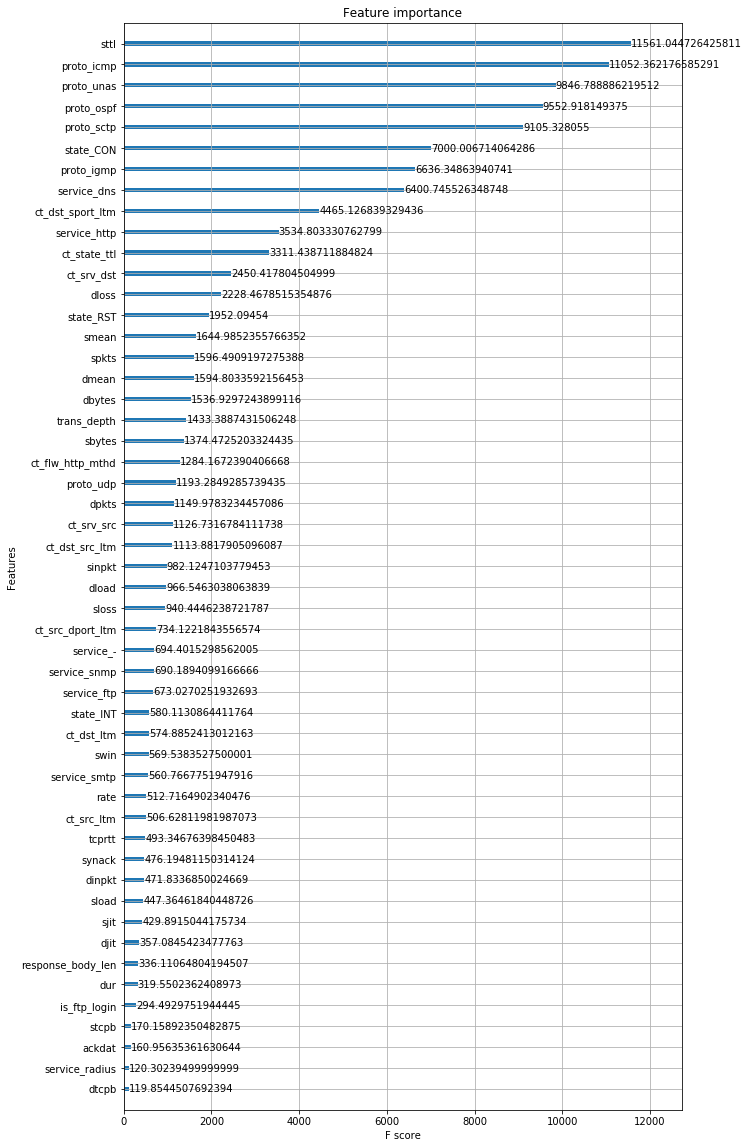

In [37]:
## PLOT IMPORTANCE OF FEATURES with type cover
# ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
xgb.plot_importance(xg_clf, importance_type='cover')
plt.rcParams['figure.figsize'] = [30, 50]
plt.show()

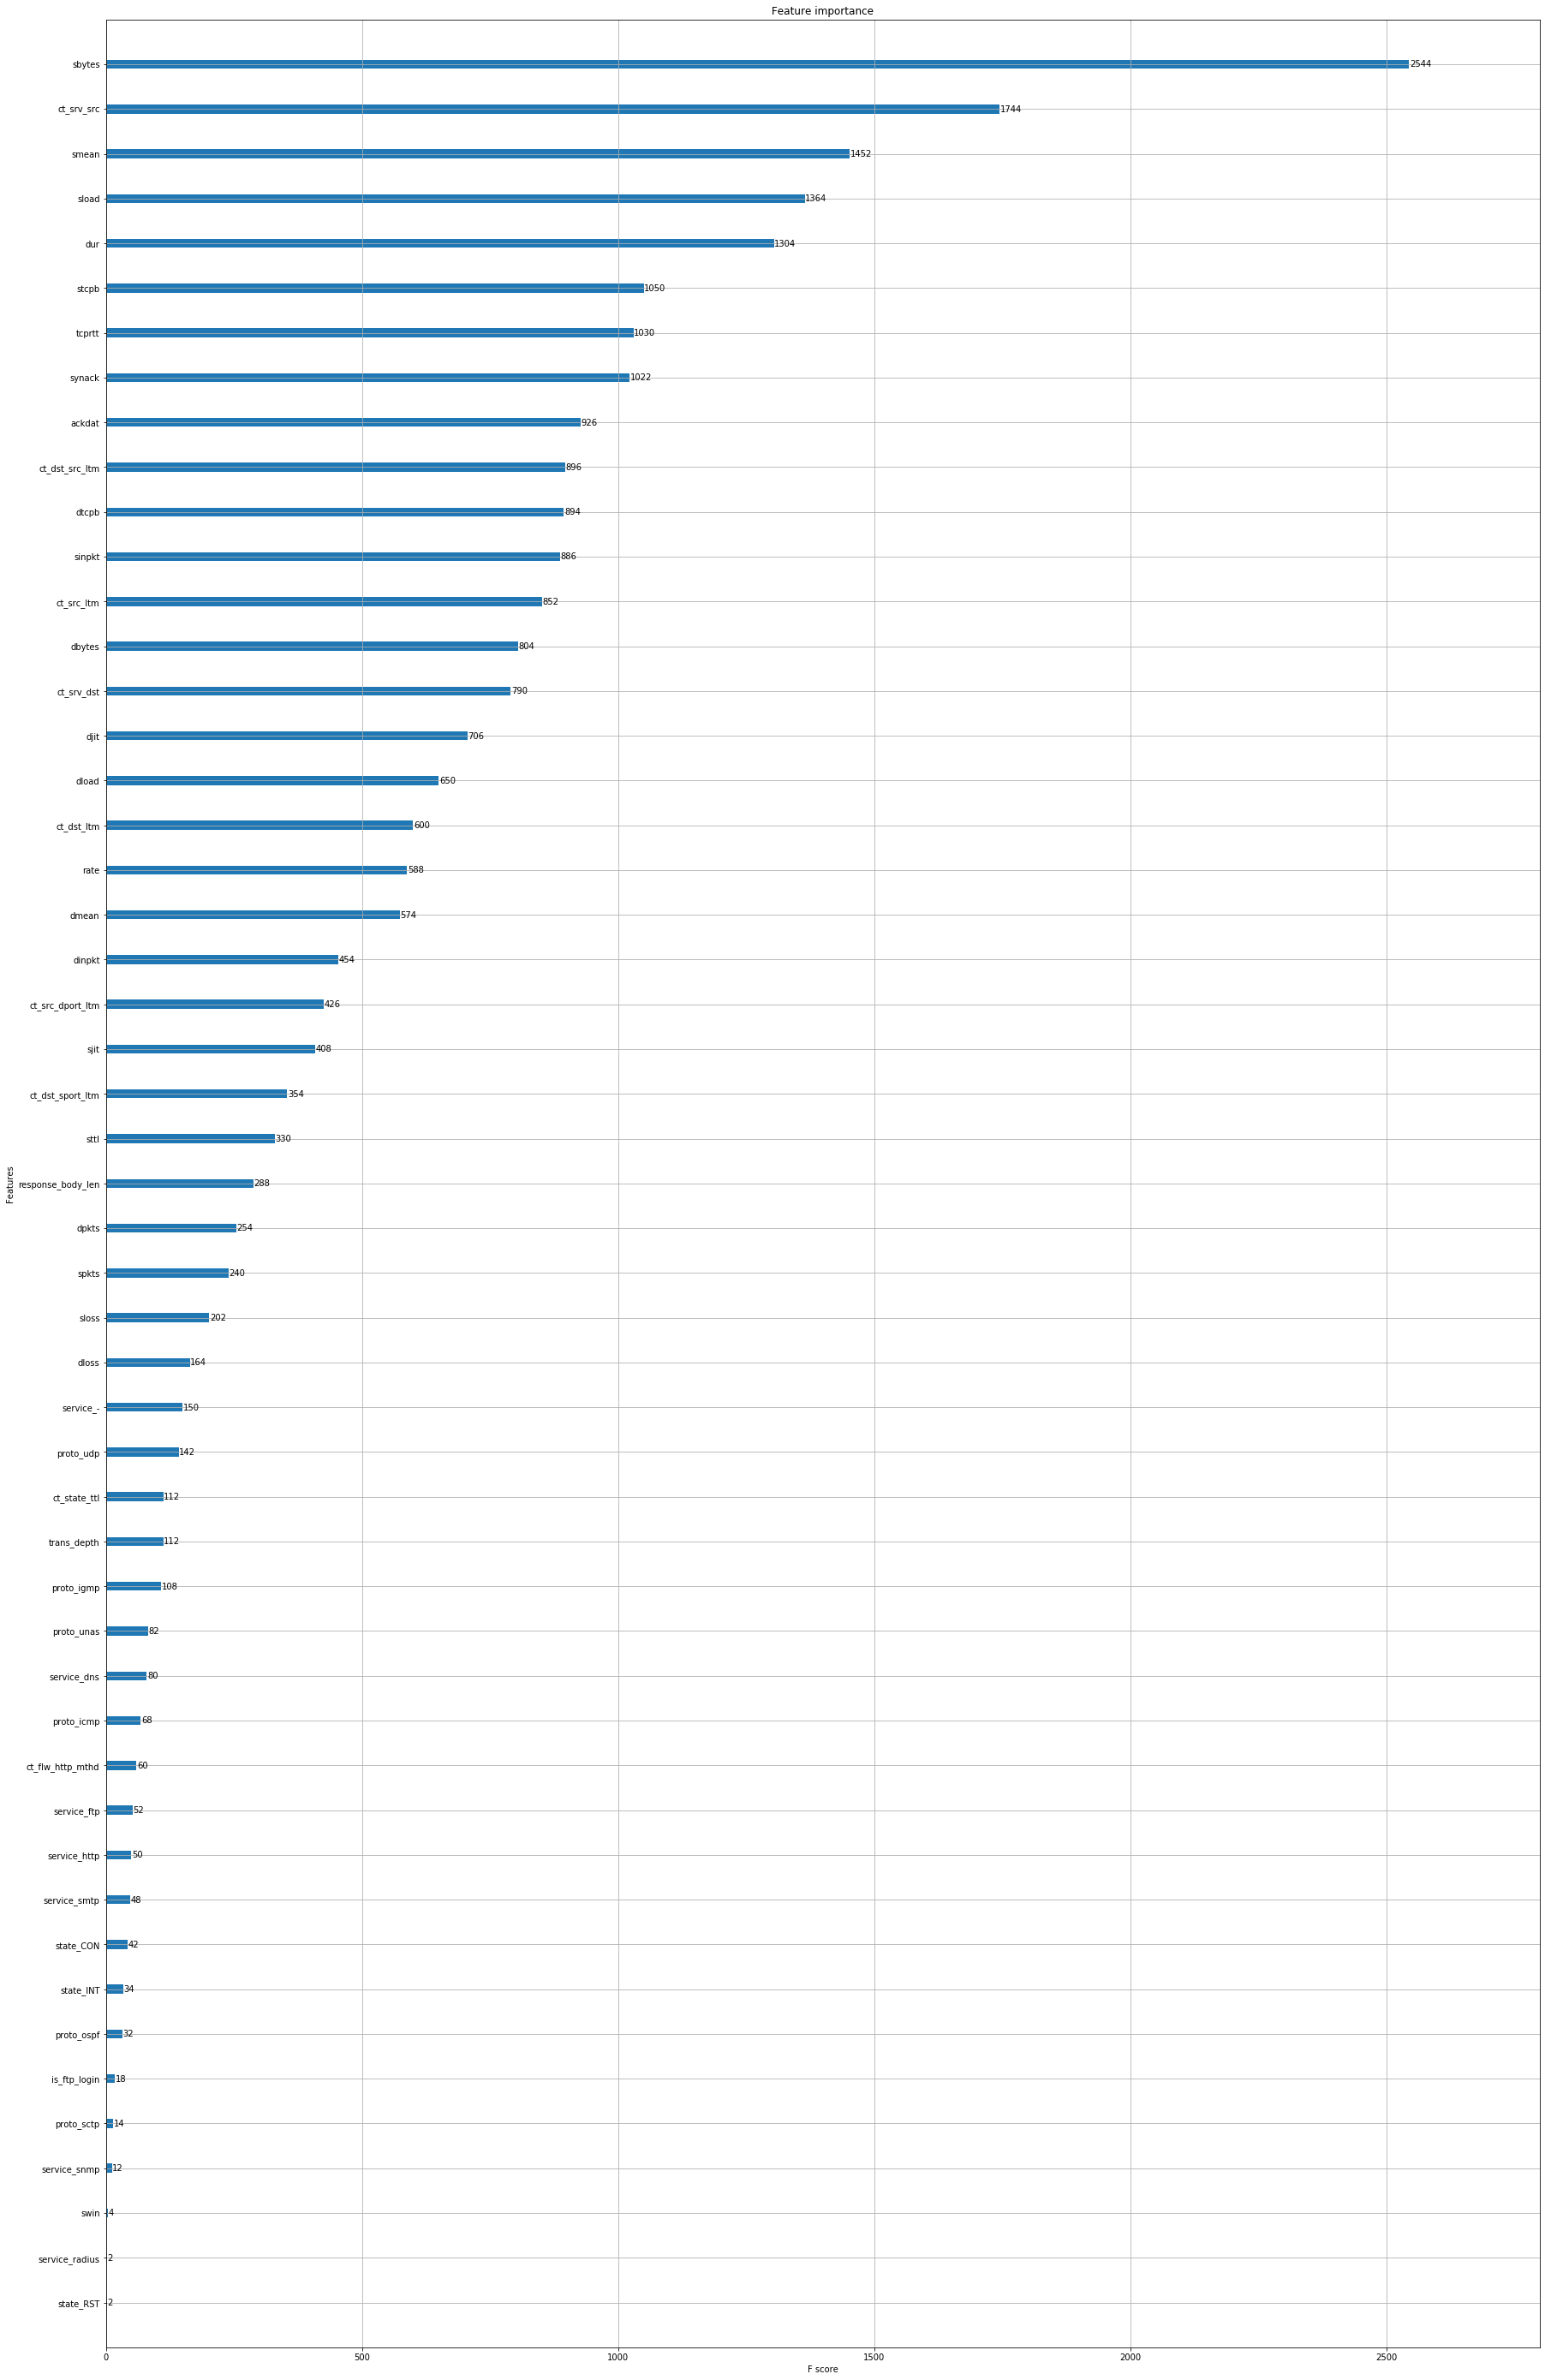

In [38]:
## PLOT IMPORTANCE OF FEATURES with type weight
# ”weight” is the number of times a feature appears in a tree
xgb.plot_importance(xg_clf, importance_type='weight')
plt.show()

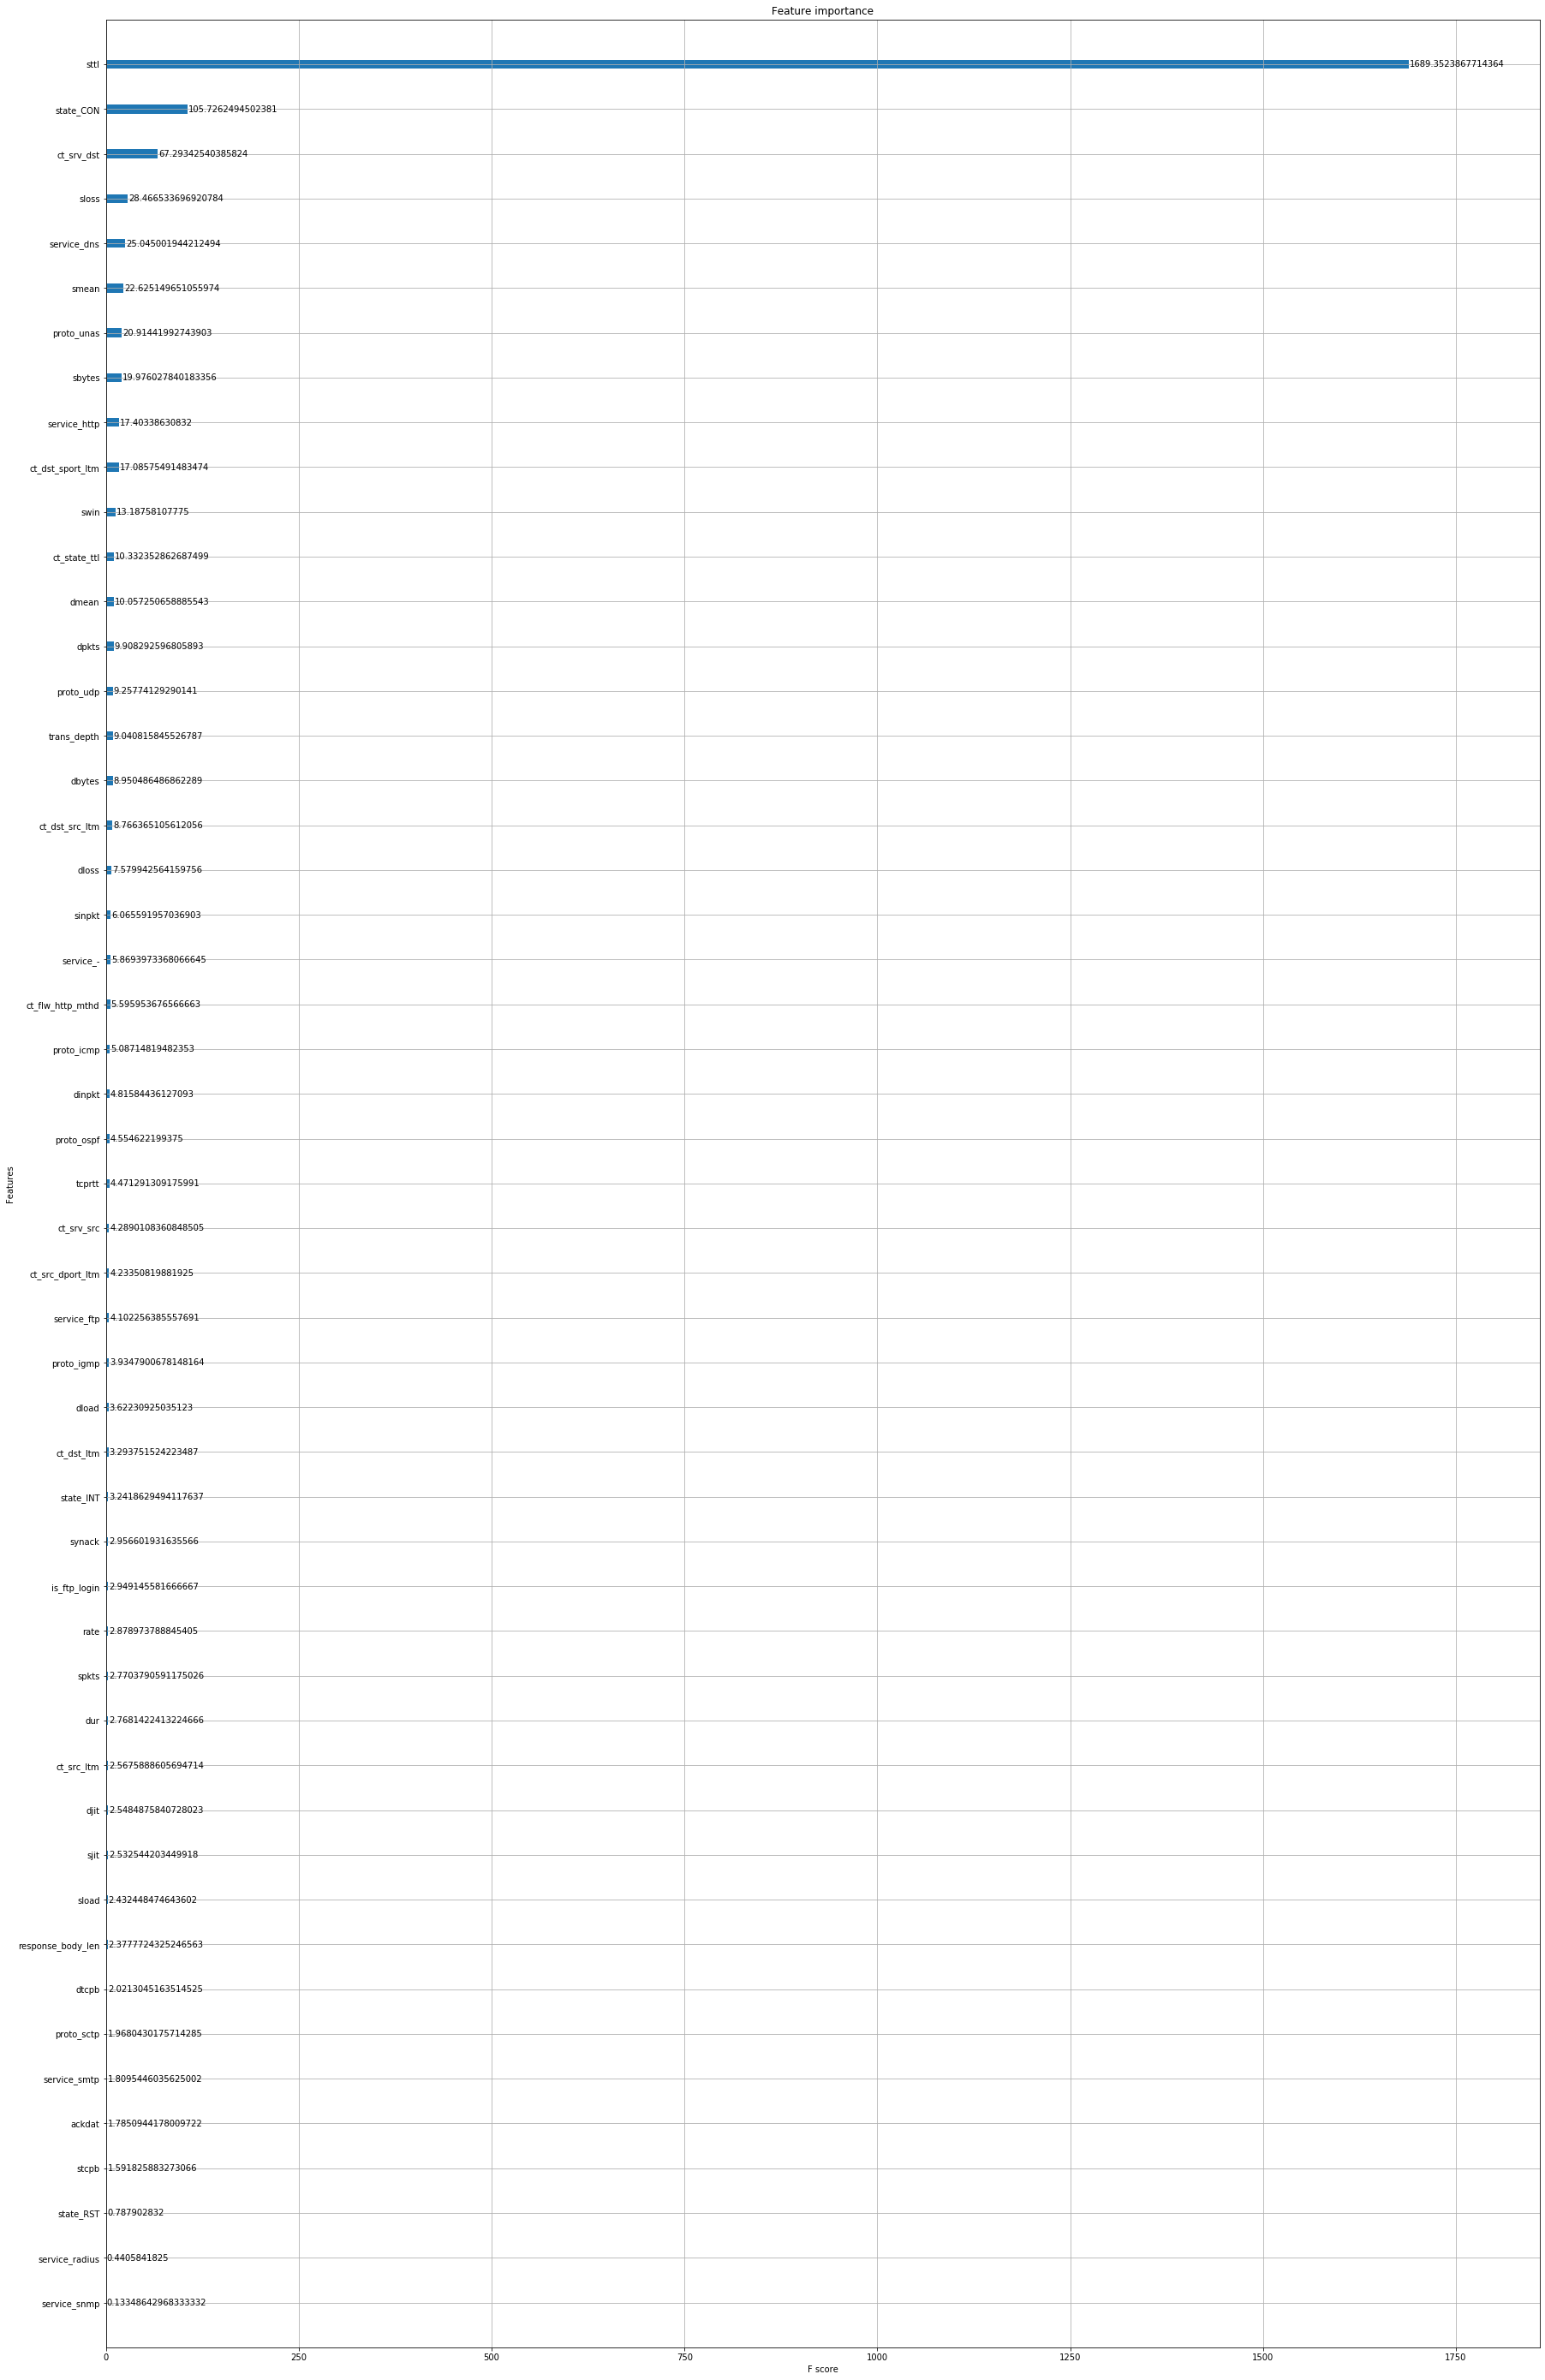

In [39]:
## PLOT IMPORTANCE OF FEATURES with type gain
# ”gain” is the average gain of splits which use the feature
xgb.plot_importance(xg_clf, importance_type='gain')
plt.show()

In [46]:
# plot single tree
from xgboost import plot_tree
from matplotlib.pylab import rcParams
# import graphviz
# python -c "import graphviz"
##set up the parameters
rcParams['figure.figsize'] = 30,50
print('This is a plot of the first decision tree in the model (index 0), showing the features and feature values for each split as well as the output leaf nodes.!')
plot_tree(xg_clf, num_trees=0, rankdir='LR')
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-59680ac71ab0>, line 5)